In [1]:
import numpy as np
from PIL import Image, ImageFont, ImageDraw
from PIL.ImageChops import add, subtract, multiply, difference, screen
import PIL.ImageStat as stat
from skimage.io import imread, imsave, imshow, show, imread_collection,imshow_collection
from skimage import color, exposure, img_as_float, data
from skimage.transform import SimilarityTransform, warp, swirl, ProjectiveTransform
from skimage.util import invert, random_noise, montage
import matplotlib.image as mpimg
import matplotlib.pylab as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from matplotlib.path import Path
from scipy.ndimage import affine_transform, zoom
from scipy import misc

Triển khai Harris Corner Detector với độ chính xác dưới điểm ảnh

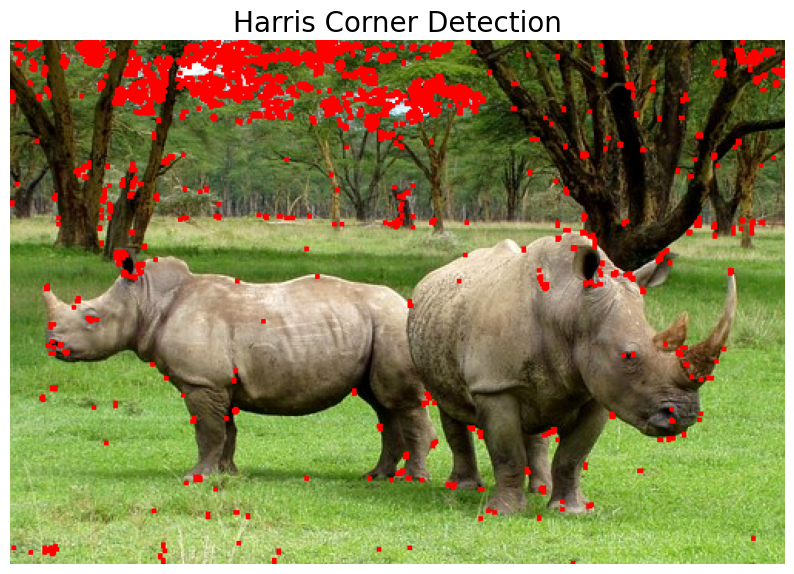

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image = cv2.imread('../images/rhino.jpg')
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = np.float32(gray_image)
dst = cv2.cornerHarris(gray_image, blockSize=2, ksize=3, k=0.04)
dst = cv2.dilate(dst, None)
image_copy = image.copy()
image_copy[dst > 0.01 * dst.max()] = [0, 0, 255]
plt.figure(figsize=(10, 8))
plt.imshow(cv2.cvtColor(image_copy, cv2.COLOR_BGR2RGB))
plt.title('Harris Corner Detection', size=20)
plt.axis('off')
plt.show()

FLANN-based Approximate Nearest Neighbor Matcher

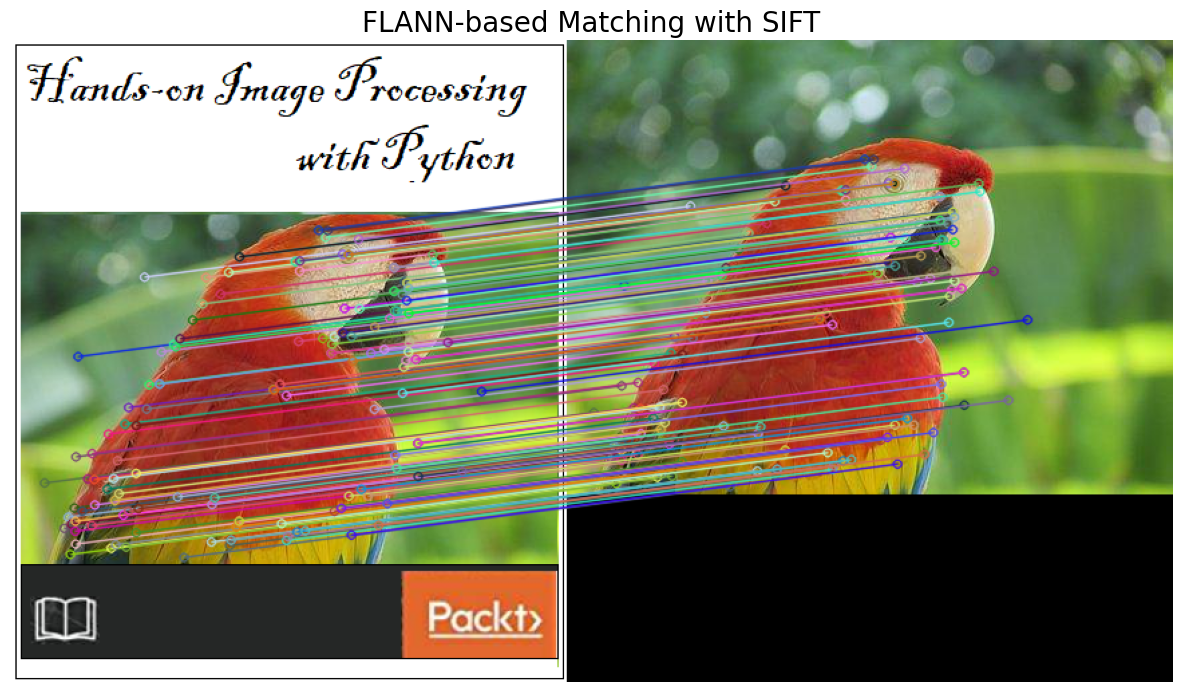

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
image1 = cv2.imread('../images/book.png')
image2 = cv2.imread('../images/parrot.png')
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(gray1, None)
kp2, des2 = sift.detectAndCompute(gray2, None)
index_params = dict(algorithm=1, trees=10)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)
good_matches = []
for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good_matches.append(m)
img_matches = cv2.drawMatches(image1, kp1, image2, kp2, good_matches, None,
                               flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(img_matches, cv2.COLOR_BGR2RGB))
plt.title('FLANN-based Matching with SIFT', size=20)
plt.axis('off')
plt.show()